In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import Flask

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Stations = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
import datetime as dt
from datetime import timedelta

In [11]:
# Find the most recent date in the data set, 2017-08-23
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [12]:
# Find the date 12 months before most recent data point
thirty_days = dt.date(2017, 8, 23) - timedelta(days=365)
print(f"12 months before most recent data point: {thirty_days}")
print("---------------------------")

# Design a query to retrieve the last 12 months of precipitation data in descending order
year_prcp = session.query(Measurement).filter(Measurement.date >= dt.date(2016, 8, 23)).order_by(Measurement.date.desc())
for p in year_prcp:
    print("Date:", p.date, "Precipitation:", p.prcp)

12 months before most recent data point: 2016-08-23
---------------------------
Date: 2017-08-23 Precipitation: 0.0
Date: 2017-08-23 Precipitation: 0.0
Date: 2017-08-23 Precipitation: 0.08
Date: 2017-08-23 Precipitation: 0.45
Date: 2017-08-22 Precipitation: 0.0
Date: 2017-08-22 Precipitation: 0.0
Date: 2017-08-22 Precipitation: 0.5
Date: 2017-08-21 Precipitation: 0.0
Date: 2017-08-21 Precipitation: 0.02
Date: 2017-08-21 Precipitation: None
Date: 2017-08-21 Precipitation: 0.56
Date: 2017-08-20 Precipitation: 0.0
Date: 2017-08-20 Precipitation: 0.01
Date: 2017-08-20 Precipitation: None
Date: 2017-08-19 Precipitation: 0.0
Date: 2017-08-19 Precipitation: 0.0
Date: 2017-08-19 Precipitation: None
Date: 2017-08-19 Precipitation: 0.09
Date: 2017-08-18 Precipitation: 0.0
Date: 2017-08-18 Precipitation: 0.0
Date: 2017-08-18 Precipitation: 0.06
Date: 2017-08-18 Precipitation: None
Date: 2017-08-17 Precipitation: 0.0
Date: 2017-08-17 Precipitation: 0.05
Date: 2017-08-17 Precipitation: 0.01
Date: 2

In [13]:
#Create DataFrame to plot, drop null values
year_prcp_df = pd.DataFrame([(p.date, p.prcp) for p in year_prcp], columns=['date','precipitation'])
year_prcp_df.dropna(axis=0, inplace=True)
year_prcp_df

,date,precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2224,2016-08-23,0.15
2225,2016-08-23,0.05
2227,2016-08-23,0.02
2228,2016-08-23,1.79


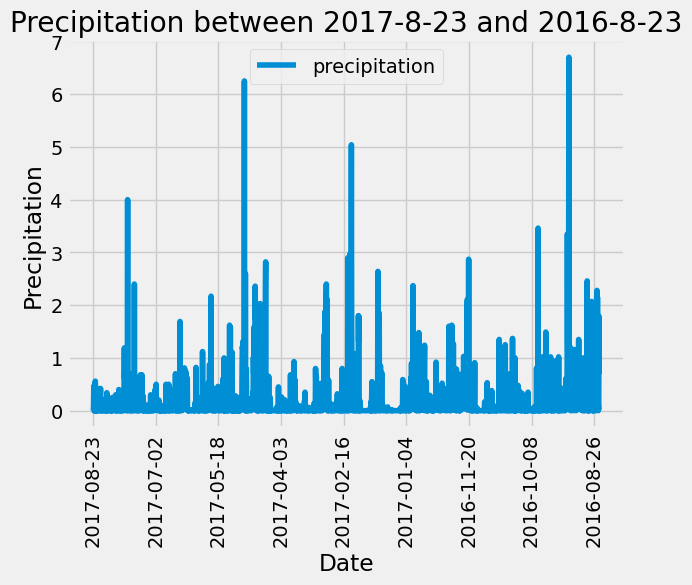

In [36]:
#plot the results. Starting from the most recent data point in the database.
year_prcp_df.plot(x="date",y="precipitation",kind='line', rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation between 2017-8-23 and 2016-8-23")
plt.show()

In [14]:
# Calculate the date one year from the last date in data set.
year_ahead = dt.date(2017, 8, 23) + timedelta(days=365)
year_ahead

datetime.date(2018, 8, 23)

In [15]:
# Perform a query to retrieve the data and precipitation scores
dates_prcp = session.query(Measurement.date, Measurement.prcp).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names. Drop null values
prcp_df = pd.DataFrame(dates_prcp)
prcp_df.rename(columns={'prcp': 'precipitation'}, inplace=True)
prcp_df.dropna(axis=0, inplace=True)
prcp_df

,date,precipitation
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
5,2010-01-07,0.06
...,...,...
19543,2017-08-17,0.13
19545,2017-08-19,0.09
19547,2017-08-21,0.56
19548,2017-08-22,0.50


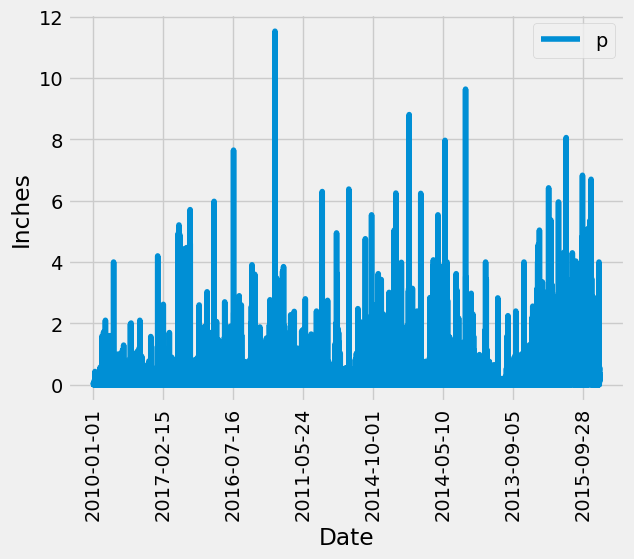

In [39]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x="date", y="precipitation",kind='line',rot=90)
plt.legend("precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.precipitation.describe()

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
session.query(Stations.station).count()

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count().desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [75]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = (Measurement.station,
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs))

active_station = session.query(*sel).filter(Measurement.station == 'USC00519281').order_by(Measurement.station).first()
active_station

('USC00519281', 54.0, 85.0, 71.66378066378067)

In [18]:
# Using the most active station id, query temp
station_temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').all()
for t in station_temp:
    print("Date:", t.date, "Temperature:", t.tobs)

Date: 2010-01-01 Temperature: 70.0
Date: 2010-01-02 Temperature: 62.0
Date: 2010-01-03 Temperature: 74.0
Date: 2010-01-04 Temperature: 75.0
Date: 2010-01-05 Temperature: 74.0
Date: 2010-01-06 Temperature: 76.0
Date: 2010-01-07 Temperature: 69.0
Date: 2010-01-08 Temperature: 66.0
Date: 2010-01-09 Temperature: 70.0
Date: 2010-01-10 Temperature: 75.0
Date: 2010-01-11 Temperature: 64.0
Date: 2010-01-12 Temperature: 60.0
Date: 2010-01-13 Temperature: 61.0
Date: 2010-01-14 Temperature: 68.0
Date: 2010-01-15 Temperature: 64.0
Date: 2010-01-16 Temperature: 66.0
Date: 2010-01-17 Temperature: 67.0
Date: 2010-01-18 Temperature: 70.0
Date: 2010-01-19 Temperature: 67.0
Date: 2010-01-20 Temperature: 67.0
Date: 2010-01-21 Temperature: 69.0
Date: 2010-01-22 Temperature: 60.0
Date: 2010-01-23 Temperature: 75.0
Date: 2010-01-24 Temperature: 75.0
Date: 2010-01-25 Temperature: 65.0
Date: 2010-01-26 Temperature: 75.0
Date: 2010-01-27 Temperature: 69.0
Date: 2010-01-28 Temperature: 67.0
Date: 2010-01-29 Tem

In [20]:
#Create Dataframe to plot, drop null values
station_temp_df = pd.DataFrame([(t.date, t.tobs) for t in station_temp], columns=['date','temperature'])
station_temp_df.dropna(axis=0, inplace=True)
station_temp_df

,date,temperature
0,2010-01-01,70.0
1,2010-01-02,62.0
2,2010-01-03,74.0
3,2010-01-04,75.0
4,2010-01-05,74.0
...,...,...
2767,2017-08-14,77.0
2768,2017-08-15,77.0
2769,2017-08-16,76.0
2770,2017-08-17,76.0


In [21]:
year_temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= dt.date(2016, 8, 23)).all()

In [22]:
year_temp_df = pd.DataFrame([(t.date, t.tobs) for t in station_temp], columns=['date','temperature'])
year_temp_df.dropna(axis=0, inplace=True)
year_temp_df

,date,temperature
0,2010-01-01,70.0
1,2010-01-02,62.0
2,2010-01-03,74.0
3,2010-01-04,75.0
4,2010-01-05,74.0
...,...,...
2767,2017-08-14,77.0
2768,2017-08-15,77.0
2769,2017-08-16,76.0
2770,2017-08-17,76.0


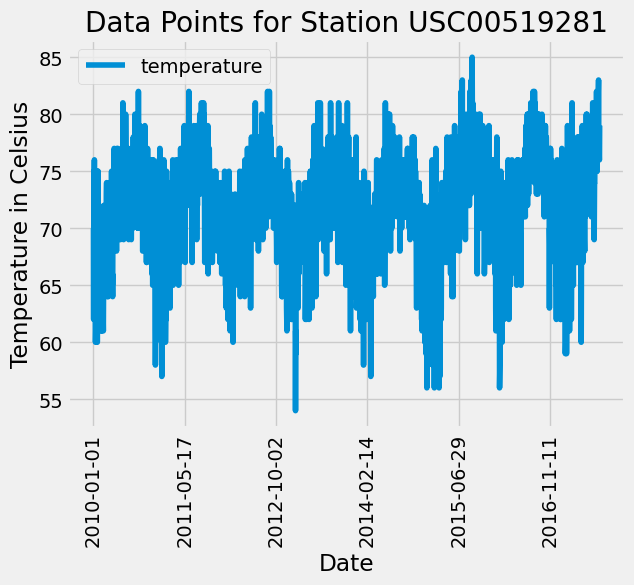

In [23]:
#plot the results.
#year_xticks = ()
year_temp_df.plot(x="date",y="temperature",kind='line',rot=90)
#plt.xticks(year_xticks)
plt.xlabel("Date")
plt.ylabel("Temperature in Celsius")
plt.title("Data Points for Station USC00519281")
plt.show()

# Close Session

In [41]:
# Close Session
session.close()